In [1]:
# Outline for exploratory paper

1. Tyre usage 
    - How long was each tire used for
2. How effective was each tire
    - Break down delta from each individual driver's best lap time of stint
    - Compare data from each team
3. When was each tyre used
    - Compare over total race distance
    - Compare data from each team

SyntaxError: invalid syntax (<ipython-input-1-e60845c1dbfb>, line 3)

In [3]:
import numpy as np
from numpy import diff
import scipy as sp
import pandas as pd
import plotly.express as px
from pandas import Series, DataFrame
import plotly.graph_objects as go
import scipy
import itertools
## loess regression model 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import statsmodels.api as sm
import seaborn as sns

path = 'master.csv'

full = pd.read_csv(path)
full.head()

full['dist_remain'] = full['race_distance'] - full['distance']

In [4]:
## isolate each compound to its own dataframe
#c1 = hardest, c5 = softest 

# c1 
c1 = full[(full.compound == 'C1')]
# c2 
c2 = full[(full.compound == 'C2')]
# c3
c3 = full[(full.compound == 'C3')]
# c4
c4 = full[(full.compound == 'C4')]
# c5
c5 = full[(full.compound == 'C5')]

## assign constructor to each driver


In [ ]:
# to view probability density graph for each compound
# tells us what distances compound was used most for
# create histograms for each

# c1
c1_hist = px.histogram(c1, x = "stint_distance")
c1_hist.show()
#c2 
c2_hist = px.histogram(c2, x = "stint_distance")
c2_hist.show()
#c3 
c3_hist = px.histogram(c3, x = "stint_distance")
c3_hist.show()
#c4
c4_hist = px.histogram(c4, x = "stint_distance")
c4_hist.show()
#c5
c5_hist = px.histogram(c5, x = "stint_distance")
c5_hist.show()

['williams', 'alphatauri', 'red_bull', 'mercedes', 'ferrari', 'renault', 'alfa', 'racing_point', 'mclaren', 'haas']


C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

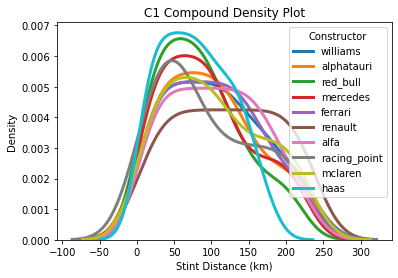

In [29]:
constructors = c1.constructorRef


def get_constructors(constructors):

    list_of_constructors = []

    constructors = set(constructors)

    for constructors in constructors:
        list_of_constructors.append(constructors)

    return list_of_constructors


#print(get_constructors(constructors))
constructors = print(get_constructors(constructors))
constructors
# Iterate through the five airlines
constructors = c1.constructorRef


def get_constructors(constructors):

    list_of_constructors = []

    constructors = set(constructors)

    for constructors in constructors:
        list_of_constructors.append(constructors)

    return list_of_constructors


#print(get_constructors(constructors))
constructors = get_constructors(constructors)
constructors


for constructor in constructors:
    # Subset to the constructor
    subset = c1[c1['constructorRef'] == constructor]
    
    # Draw the density plot
    sns.distplot(subset['stint_distance'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = constructor)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Constructor')
plt.title('C1 Compound Density Plot')
plt.xlabel('Stint Distance (km)')
plt.ylabel('Density')
plt.savefig('c1_stint.png', dpi=300, bbox_inches='tight')

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

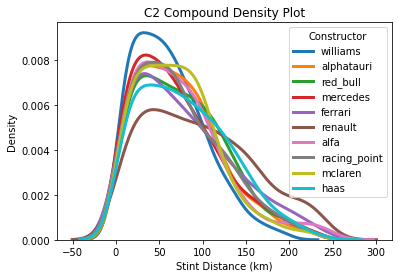

In [28]:
for constructor in constructors:
    # Subset to the constructor
    subset = c2[c2['constructorRef'] == constructor]
    
    # Draw the density plot
    sns.distplot(subset['stint_distance'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = constructor)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Constructor')
plt.title('C2 Compound Density Plot')
plt.xlabel('Stint Distance (km)')
plt.ylabel('Density')
plt.savefig('c2_stint.png', dpi=300, bbox_inches='tight')

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

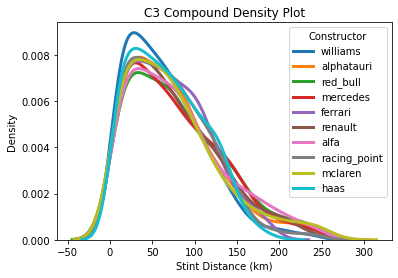

In [27]:
for constructor in constructors:
    # Subset to the constructor
    subset = c3[c3['constructorRef'] == constructor]
    
    # Draw the density plot
    sns.distplot(subset['stint_distance'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = constructor)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Constructor')
plt.title('C3 Compound Density Plot')
plt.xlabel('Stint Distance (km)')
plt.ylabel('Density')
plt.savefig('c3_stint.png', dpi=300, bbox_inches='tight')

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

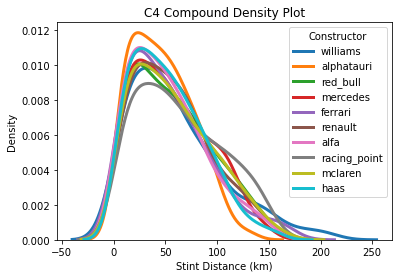

In [26]:
for constructor in constructors:
    # Subset to the constructor
    subset = c4[c4['constructorRef'] == constructor]
    
    # Draw the density plot
    sns.distplot(subset['stint_distance'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = constructor)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Constructor')
plt.title('C4 Compound Density Plot')
plt.xlabel('Stint Distance (km)')
plt.ylabel('Density')
plt.savefig('c4_stint.png', dpi=300, bbox_inches='tight')

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

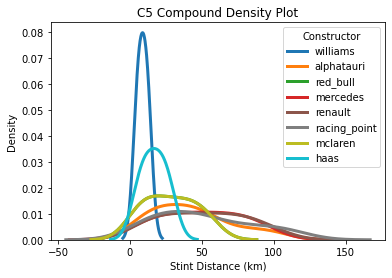

In [25]:
for constructor in constructors:
    # Subset to the constructor
    subset = c5[c5['constructorRef'] == constructor]
    
    # Draw the density plot
    sns.distplot(subset['stint_distance'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = constructor)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Constructor')
plt.title('C5 Compound Density Plot')
plt.xlabel('Stint Distance (km)')
plt.ylabel('Density')
plt.savefig('c5_stint.png', dpi=300, bbox_inches='tight')

In [ ]:
2. How effective was each tire
    - Break down delta from each individual driver's best lap time of stint
    - Compare data from each team
    
Used loess regression, local regression, to observe tyre life of each compound.
Delta calculated per race, per stint, per driver. From each driver's stint, what distance did each tyre perform best? Degrade?

In [5]:

avg_lt = full.groupby(['raceid','code','stint']).agg({
    'seconds' : 'mean'}).reset_index()

rs = pd.merge(full, avg_lt, how = "inner", on = ["raceid", "code", "stint"])

rs['sec_diff'] = rs['seconds_x'] - rs['seconds_y']
rs['dist_remain'] = rs['race_distance'] - rs['distance']

c1s = rs[rs.compound == 'C1']
c2s = rs[rs.compound == 'C2']
c3s = rs[rs.compound == 'C3']
c4s = rs[rs.compound == 'C4']
c5s = rs[rs.compound == 'C5']

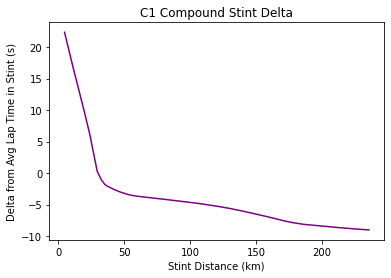

In [9]:
# calculates local regression prediction
def regress(data, xvar, yvar):
    lowess = sm.nonparametric.lowess(xvar, yvar, frac = .3)
    X = list(zip(*lowess))[0]
    Y = list(zip(*lowess))[1]
    return (X,Y)

# For article: Main Tyre Compounds
#c1
c1_main = regress(c1s, c1s.sec_diff, c1s.stint_distance)
#plt.plot(c1s.stint_distance, c1s.sec_diff, 'o')
plt.plot(c1_main[0], c1_main[1], '-', color = 'purple')
plt.title('C1 Compound Stint Delta')
plt.xlabel('Stint Distance (km)')
plt.ylabel('Delta from Avg Lap Time in Stint (s)')
#plt.show()
plt.savefig('c1_delta.png', dpi=300, bbox_inches='tight')

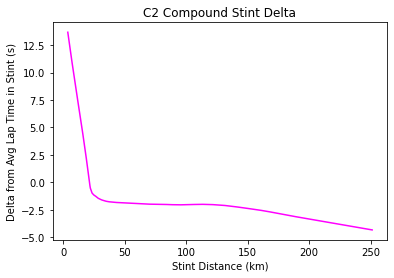

In [10]:
#c2
c2_main = regress(c2s, c2s.sec_diff, c2s.stint_distance)
plt.plot(c2_main[0], c2_main[1], '-', color = 'magenta')
plt.title('C2 Compound Stint Delta')
plt.xlabel('Stint Distance (km)')
plt.ylabel('Delta from Avg Lap Time in Stint (s)')
#plt.show()
plt.savefig('c2_delta.png', dpi=300, bbox_inches='tight')

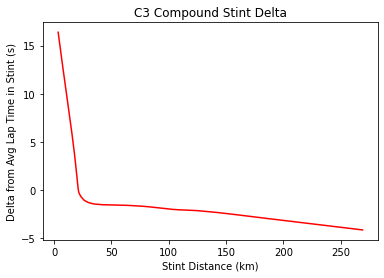

In [11]:
#c3
c3_main = regress(c3s, c3s.sec_diff, c3s.stint_distance)
plt.plot(c3_main[0], c3_main[1], '-', color = 'red')
plt.title('C3 Compound Stint Delta')
plt.xlabel('Stint Distance (km)')
plt.ylabel('Delta from Avg Lap Time in Stint (s)')
#plt.show()
plt.savefig('c3_delta.png', dpi=300, bbox_inches='tight')

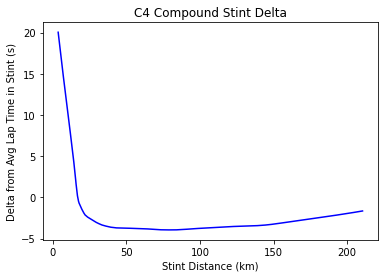

In [12]:
#c4
c4_main = regress(c4s, c4s.sec_diff, c4s.stint_distance)
plt.plot(c4_main[0], c4_main[1], '-', color = 'blue')
plt.title('C4 Compound Stint Delta')
plt.xlabel('Stint Distance (km)')
plt.ylabel('Delta from Avg Lap Time in Stint (s)')
#plt.show()
plt.savefig('c4_delta.png', dpi=300, bbox_inches='tight')

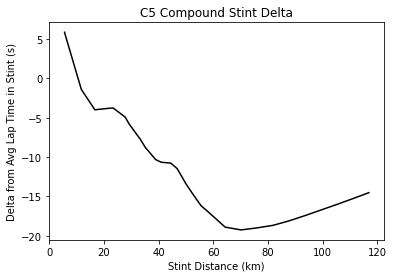

In [13]:
#c5
c5_main = regress(c5s, c5s.sec_diff, c5s.stint_distance)
plt.plot(c5_main[0], c5_main[1], '-', color = 'black')
plt.title('C5 Compound Stint Delta')
plt.xlabel('Stint Distance (km)')
plt.ylabel('Delta from Avg Lap Time in Stint (s)')
#plt.show()
plt.savefig('c5_delta.png', dpi=300, bbox_inches='tight')

In [ ]:
# c1
c1_hist = px.histogram(c1, x = "position")
c1_hist.show()
#c2 
c2_hist = px.histogram(c2, x = "position")
c2_hist.show()
#c3 
c3_hist = px.histogram(c3, x = "position")
c3_hist.show()
#c4
c4_hist = px.histogram(c4, x = "position")
c4_hist.show()
#c5
c5_hist = px.histogram(c5, x = "position")
c5_hist.show()

In [ ]:
# c1
c1_hist = px.histogram(c1, x = "dist_remain")
c1_hist.show()
#c2 
c2_hist = px.histogram(c2, x = "dist_remain")
c2_hist.show()
#c3 
c3_hist = px.histogram(c3, x = "dist_remain")
c3_hist.show()
#c4
c4_hist = px.histogram(c4, x = "dist_remain")
c4_hist.show()
#c5
c5_hist = px.histogram(c5, x = "dist_remain")
c5_hist.show()

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

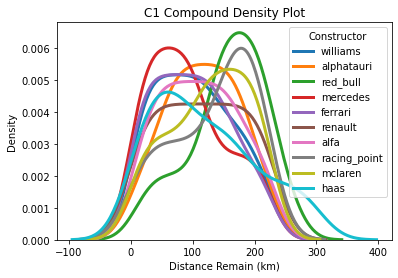

In [21]:
for constructor in constructors:
    # Subset to the constructor
    subset = c1[c1['constructorRef'] == constructor]
    
    # Draw the density plot
    sns.distplot(subset['dist_remain'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = constructor)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Constructor')
plt.title('C1 Compound Density Plot')
plt.xlabel('Distance Remain (km)')
plt.ylabel('Density')
plt.savefig('c1_dist.png', dpi=300, bbox_inches='tight')

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

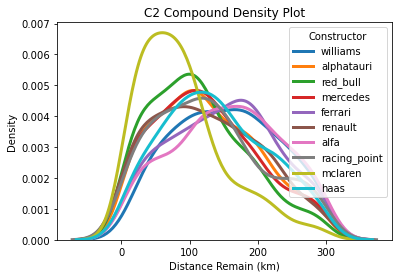

In [20]:
for constructor in constructors:
    # Subset to the constructor
    subset = c2[c2['constructorRef'] == constructor]
    
    # Draw the density plot
    sns.distplot(subset['dist_remain'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = constructor)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Constructor')
plt.title('C2 Compound Density Plot')
plt.xlabel('Distance Remain (km)')
plt.ylabel('Density')
plt.savefig('c2_dist.png', dpi=300, bbox_inches='tight')

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

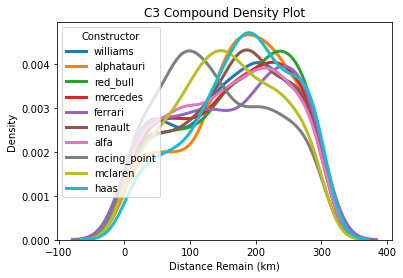

In [18]:
for constructor in constructors:
    # Subset to the constructor
    subset = c3[c3['constructorRef'] == constructor]
    
    # Draw the density plot
    sns.distplot(subset['dist_remain'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = constructor)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Constructor')
plt.title('C3 Compound Density Plot')
plt.xlabel('Distance Remain (km)')
plt.ylabel('Density')
plt.savefig('c3_dist.png', dpi=300, bbox_inches='tight')

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

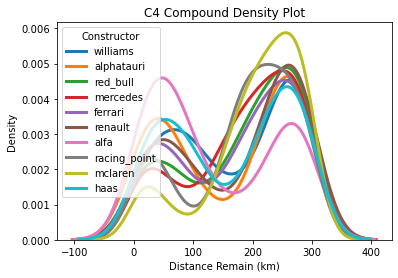

In [17]:
for constructor in constructors:
    # Subset to the constructor
    subset = c4[c4['constructorRef'] == constructor]
    
    # Draw the density plot
    sns.distplot(subset['dist_remain'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = constructor)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Constructor')
plt.title('C4 Compound Density Plot')
plt.xlabel('Distance Remain (km)')
plt.ylabel('Density')
plt.savefig('c4_dist.png', dpi=300, bbox_inches='tight')

C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\andre\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

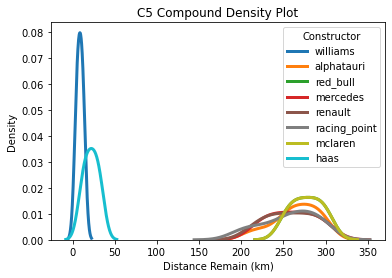

In [16]:
for constructor in constructors:
    # Subset to the constructor
    subset = c5[c5['constructorRef'] == constructor]
    
    # Draw the density plot
    sns.distplot(subset['dist_remain'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = constructor)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Constructor')
plt.title('C5 Compound Density Plot')
plt.xlabel('Distance Remain (km)')
plt.ylabel('Density')
plt.savefig('c5_dist.png', dpi=300, bbox_inches='tight')